# 230968078 - Ishan Suryawanshi - Week5

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

2025-09-01 13:05:23.600015: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756731923.889945      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756731923.960942      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from tensorflow.keras.layers import Dense, Flatten, SimpleRNN, LSTM
from tensorflow.keras.models import Sequential

In [11]:
import matplotlib.pyplot as plt

## Generating your own Time Series Data and Testing Model on it

In [3]:
def generate_time_series(sample_size, n_steps):
    freq1, freq2, offset1, offset2 = np.random.rand(4, sample_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 *np.sin((time - offset1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offset2) * (freq2 * 20 + 10))
    series += 0.1 * (np.random.rand(sample_size, n_steps)-0.5)
    return series[..., np.newaxis].astype(np.float32)

In [4]:
series = generate_time_series(10000, 51)

In [5]:
x = series[:, :50]
y = series[:, 50]

In [6]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=1/3, random_state=42)

In [12]:
def plot_history(history, title):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.title(f"{title} - Loss Curve")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history["mae"], label="Train MAE")
    plt.plot(history.history["val_mae"], label="Val MAE")
    plt.xlabel("Epochs")
    plt.ylabel("MAE")
    plt.title(f"{title} - MAE Curve")
    plt.legend()

    plt.show()

In [8]:
mlp = Sequential([
    Flatten(input_shape=[50, 1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-09-01 13:06:10.749386: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
mlp.compile(loss='mse', optimizer='adam', metrics=['mae'])
history_mlp = mlp.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0579 - mae: 0.1593 - val_loss: 0.0056 - val_mae: 0.0591
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0049 - mae: 0.0557 - val_loss: 0.0040 - val_mae: 0.0507
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0037 - mae: 0.0488 - val_loss: 0.0039 - val_mae: 0.0496
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0033 - mae: 0.0458 - val_loss: 0.0034 - val_mae: 0.0464
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029 - mae: 0.0426 - val_loss: 0.0031 - val_mae: 0.0446
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0028 - mae: 0.0421 - val_loss: 0.0027 - val_mae: 0.0420
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0026 - mae: 0.0409 - val_loss: 0.0033 - val_mae: 0.0458
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0027 - mae: 0.0414 - val_loss: 0.0030 - val_mae: 0.0439
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

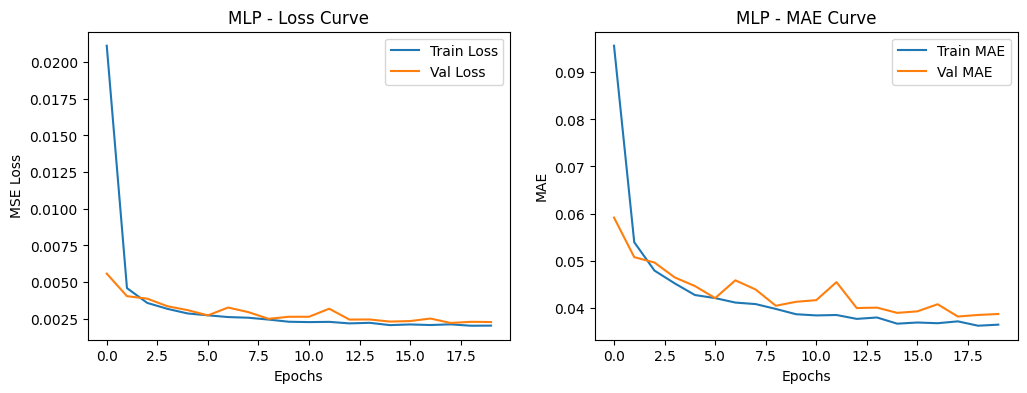

In [13]:
plot_history(history_mlp, "MLP")

In [14]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error

In [16]:
loss, mae = mlp.evaluate(x_test, y_test)
print('Loss:', loss)
print('MAE:', mae)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - mae: 0.0410
Loss: 0.0024346630088984966
MAE: 0.04012765735387802


In [20]:
rnn1 = Sequential([
    SimpleRNN(32, input_shape=[50, 1]),
    Dense(1)
])

rnn1.compile(loss="mse", optimizer="adam", metrics=["mae"])
history_rnn1 = rnn1.fit(
    x_train, y_train, 
    validation_data=(x_val, y_val), 
    epochs=20, batch_size=32)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0057 - mae: 0.0568 - val_loss: 0.0026 - val_mae: 0.0411
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0025 - mae: 0.0403 - val_loss: 0.0024 - val_mae: 0.0399
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0025 - mae: 0.0402 - val_loss: 0.0023 - val_mae: 0.0383
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0024 - mae: 0.0397 - val_loss: 0.0025 - val_mae: 0.0408
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0026 - mae: 0.0410 - val_loss: 0.0025 - val_mae: 0.0401
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0024 - mae: 0.0398 - val_loss: 0.0023 - val_mae: 0.0386
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0024 - mae: 0.0393 - val_loss: 0.0027 - val_mae: 0.0420
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0024 - mae: 0.0394 - val_loss: 0.0023 - val_mae: 0.0382
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss

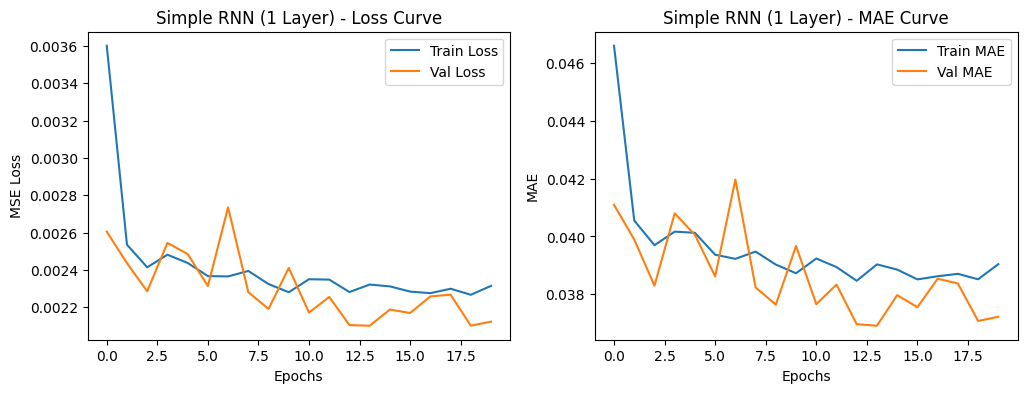

In [21]:
plot_history(history_rnn1, "Simple RNN (1 Layer)")

In [22]:
loss, mae = rnn1.evaluate(x_test, y_test)
print('Loss:', loss)
print('MAE:', mae)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - mae: 0.0384
Loss: 0.0021180228795856237
MAE: 0.03726912662386894


In [23]:
rnn2 = Sequential([
    SimpleRNN(32, return_sequences=True, input_shape=[50, 1]),
    SimpleRNN(32),
    Dense(1)
])

rnn2.compile(loss="mse", optimizer="adam", metrics=["mae"])
history_rnn2 = rnn2.fit(
    x_train, y_train, 
    validation_data=(x_val, y_val), 
    epochs=20, batch_size=32)


Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.0566 - mae: 0.1539 - val_loss: 0.0044 - val_mae: 0.0537
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0042 - mae: 0.0520 - val_loss: 0.0030 - val_mae: 0.0443
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0032 - mae: 0.0451 - val_loss: 0.0028 - val_mae: 0.0422
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0026 - mae: 0.0410 - val_loss: 0.0035 - val_mae: 0.0477
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0025 - mae: 0.0405 - val_loss: 0.0021 - val_mae: 0.0368
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0022 - mae: 0.0385 - val_loss: 0.0021 - val_mae: 0.0369
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0022 - mae: 0.0377 - val_loss: 0.0023 - val_mae: 0.0388
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0023 - mae: 0.0388 - val_loss: 0.0023 - val_mae: 0.0382
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/

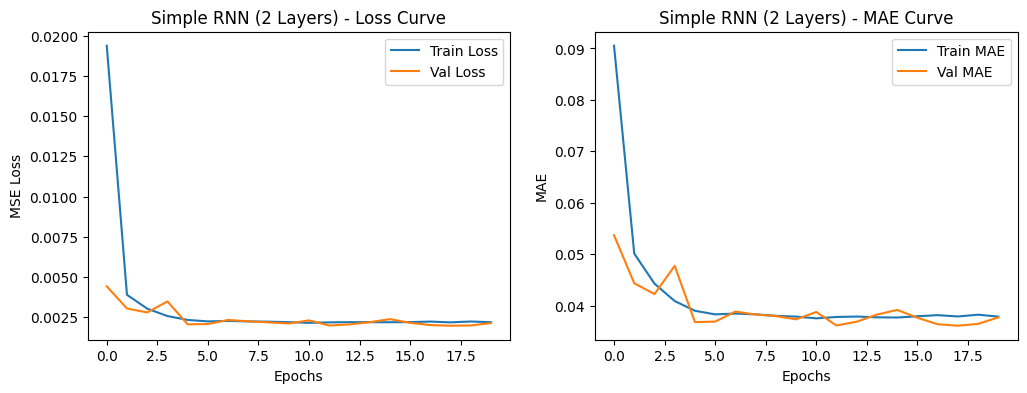

In [24]:
plot_history(history_rnn2, "Simple RNN (2 Layers)")

In [25]:
loss, mae = rnn2.evaluate(x_test, y_test)
print('Loss:', loss)
print('MAE:', mae)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mae: 0.0378
Loss: 0.0020789147820323706
MAE: 0.03687756508588791


### Comparing score for all 3 models

In [26]:
y_pred_mlp = mlp.predict(x_test)
y_pred_rnn1 = rnn1.predict(x_test)
y_pred_rnn2 = rnn2.predict(x_test)

r2_mlp = r2_score(y_test, y_pred_mlp)
r2_rnn1 = r2_score(y_test, y_pred_rnn1)
r2_rnn2 = r2_score(y_test, y_pred_rnn2)

print("R² MLP:", r2_mlp)
print("R² RNN-1:", r2_rnn1)
print("R² RNN-2:", r2_rnn2)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
R² MLP: 0.9819189031580254
R² RNN-1: 0.984270444086313
R² RNN-2: 0.984560881570969


### We can see all them give around the same score ~ 98%

## Google Stock Prediction Dataset

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv("/kaggle/input/google-stock-prediction/GOOG.csv")
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [30]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
data = df[['date', 'close']].copy()

In [33]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(data['close'].values.reshape(-1, 1))

def create_sequences(data, seq_length=60):
    x1, y1 = [], []
    for i in range(seq_length, len(data)):
        x1.append(data[i-seq_length:i, 0])
        y1.append(data[i, 0])
    return np.array(x1), np.array(y1)

x1, y1 = create_sequences(scaled_prices, 60)

In [34]:
x1 = np.reshape(x1, (x1.shape[0], x1.shape[1], 1))

In [38]:
n = x1.shape[0]
train_size = int(n*0.7)
val_size = int(n*0.2)

x1_train, y1_train = x1[:train_size], y1[:train_size]
x1_val, y1_val = x1[train_size:train_size+val_size], y1[train_size:train_size+val_size]
x1_test, y1_test = x1[train_size+val_size:], y1[train_size+val_size:]

In [48]:
model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(60, 1)),
    SimpleRNN(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [49]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)        │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_8 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = model.fit(
    x1_train, y1_train,
    validation_data=(x1_val, y1_val),
    epochs=20, batch_size=32
)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.1205 - mae: 0.1205 - val_loss: 0.0213 - val_mae: 0.0213
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0142 - mae: 0.0142 - val_loss: 0.0504 - val_mae: 0.0504
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0139 - mae: 0.0139 - val_loss: 0.0207 - val_mae: 0.0207
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0137 - mae: 0.0137 - val_loss: 0.0483 - val_mae: 0.0483
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0145 - mae: 0.0145 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0162 - mae: 0.0162 - val_loss: 0.0516 - val_mae: 0.0516
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0315 - mae: 0.0315 - val_loss: 0.0218 - val_mae: 0.0218
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0117 - mae: 0.0117 - val_loss: 0.0168 - val_mae: 0.0168
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.007

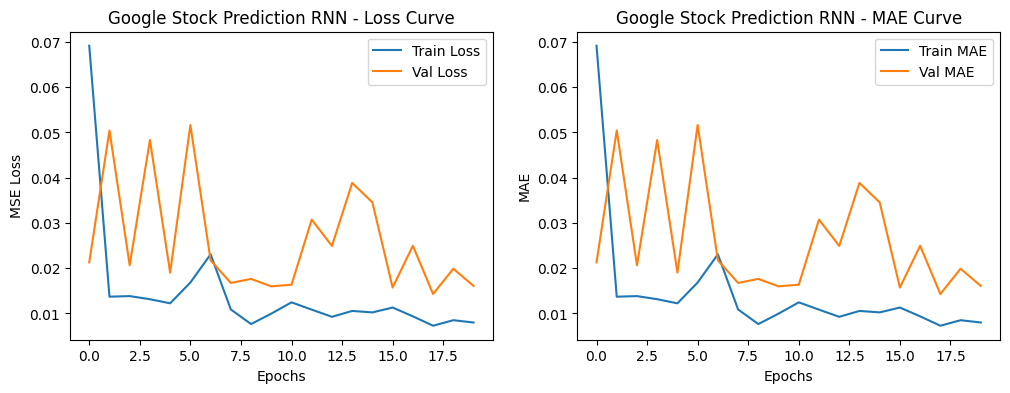

In [51]:
plot_history(history, "Google Stock Prediction RNN")

In [53]:
y_pred = model.predict(x1_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y1_test.reshape(-1, 1))

r2 = r2_score(y_test_rescaled, y_pred_rescaled)
print("R2 score:", r2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2 score: 0.4142067389056623


## Burglary Dataset

In [54]:
ds = pd.read_csv('/kaggle/input/crime-in-baltimore/BPD_Part_1_Victim_Based_Crime_Data.csv')
ds.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


In [55]:
ds['CrimeDate'] = pd.to_datetime(ds['CrimeDate'])

ds['CrimeCode'] = ds['CrimeCode'].astype(str)
larceny = ds[ds['CrimeCode'].str.startswith('6')]
burglary = ds[ds['CrimeCode'].str.startswith('5')]

In [56]:
lts = larceny.groupby('CrimeDate').size().reset_index(name='Count')
bts = burglary.groupby('CrimeDate').size().reset_index(name='Count')

In [58]:
def split_series(ts):
    train = ts[(ts['CrimeDate'].dt.year < 2016)]
    test = ts[(ts['CrimeDate'].dt.year == 2016)]
    return train, test

In [59]:
l_train, l_test = split_series(lts)
b_train, b_test = split_series(bts)

In [60]:
scal = MinMaxScaler()

def prepare_data(train, test, seq_len=30):
    train_scaled = scal.fit_transform(train['Count'].values.reshape(-1, 1))
    test_scaled = scal.transform(test['Count'].values.reshape(-1, 1))

    all_data = np.concatenate([train_scaled, test_scaled], axis=0)
    x, y = [], []
    for i in range(seq_len, len(all_data)):
        x.append(all_data[i-seq_len:i, 0])
        y.append(all_data[i, 0])
    x, y = np.array(x), np.array(y)
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))
    return x, y, len(train_scaled)

In [61]:
xl, yl, spl = prepare_data(l_train, l_test)
xb, yb, spb = prepare_data(b_train, b_test)

In [63]:
import tensorflow.keras.backend as K

In [65]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [69]:
def build_rnn(seq_len):
    model = Sequential([
        SimpleRNN(64, return_sequences=True, input_shape=(seq_len, 1)),
        SimpleRNN(64, return_sequences=True),
        SimpleRNN(32, return_sequences=True),
        SimpleRNN(32),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=[rmse, keras.metrics.MeanAbsolutePercentageError()])
    return model

In [70]:
def build_lstm(seq_len):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(seq_len, 1)),
        LSTM(64, return_sequences=True),
        LSTM(32, return_sequences=True),
        LSTM(32),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=[rmse, keras.metrics.MeanAbsolutePercentageError()])
    return model

### Training model for Larceny crime

In [72]:
rnnl = build_rnn(30)
history_rnnl = rnnl.fit(
    xl[:spl], yl[:spl],
    validation_data=(xl[spl:], yl[spl:]),
    epochs=50, batch_size=32, verbose=1
)

lstml = build_lstm(30)
history_lstml = lstml.fit(
    xl[:spl], yl[:spl],
    validation_data=(xl[spl:], yl[spl:]),
    epochs=50, batch_size=32, verbose=1
)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 0.0633 - mean_absolute_percentage_error: 2145992.7500 - rmse: 0.2099 - val_loss: 0.0106 - val_mean_absolute_percentage_error: 24.3258 - val_rmse: 0.1022
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0180 - mean_absolute_percentage_error: 324405.6875 - rmse: 0.1457 - val_loss: 0.0161 - val_mean_absolute_percentage_error: 35.2366 - val_rmse: 0.1265
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0149 - mean_absolute_percentage_error: 167711.5938 - rmse: 0.1410 - val_loss: 0.0148 - val_mean_absolute_percentage_error: 33.2637 - val_rmse: 0.1217
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0146 - mean_absolute_percentage_error: 45710.0312 - rmse: 0.1429 - val_loss: 0.0117 - val_mean_absolute_percentage_error: 27.8442 - val_rmse: 0.1085
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0141 - mean_absolute_percentage_error: 236977.0469 - rmse: 0.1445 - val_loss: 0.0161 - val_mea

In [73]:

y_pred_rnn_L = rnnl.predict(xl[spl:])
y_pred_lstm_L = lstml.predict(xl[spl:])

# Inverse transform
y_pred_rnn_L = scaler.inverse_transform(y_pred_rnn_L)
y_pred_lstm_L = scaler.inverse_transform(y_pred_lstm_L)
y_true_L = scaler.inverse_transform(yl[spl:].reshape(-1,1))

# Metrics
def evaluate(y_true, y_pred, name="Model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print(f"{name} → RMSE: {rmse:.2f}, MAPE: {mape:.2%}")
    return rmse, mape

evaluate(y_true_L, y_pred_rnn_L, "Simple RNN (Larceny)")
evaluate(y_true_L, y_pred_lstm_L, "LSTM (Larceny)")


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step
Simple RNN (Larceny) → RMSE: 243.12, MAPE: 15.09%
LSTM (Larceny) → RMSE: 194.12, MAPE: 11.39%


(194.12008857158582, 0.11391622695138198)

### Conclusion: The MAPE score is between 10% to 20% for both models (the lower the better), meaning both models are performing well. LSTM Model performs relatively better

### Training the model for Burglary crime

In [74]:
rnnb = build_rnn(30)
history_rnnb = rnnb.fit(
    xb[:spb], yb[:spb],
    validation_data=(xb[spb:], yb[spb:]),
    epochs=50, batch_size=32, verbose=1
)

lstmb = build_lstm(30)
history_lstmb = lstmb.fit(
    xb[:spb], yl[:spb],
    validation_data=(xb[spb:], yl[spb:]),
    epochs=50, batch_size=32, verbose=1
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0509 - mean_absolute_percentage_error: 55892.1953 - rmse: 0.1680 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 31.5077 - val_rmse: 0.0428
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0016 - mean_absolute_percentage_error: 8704.9082 - rmse: 0.0368 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 30.6587 - val_rmse: 0.0423
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0013 - mean_absolute_percentage_error: 13948.0430 - rmse: 0.0356 - val_loss: 0.0020 - val_mean_absolute_percentage_error: 32.0987 - val_rmse: 0.0376
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0012 - mean_absolute_percentage_error: 75444.5547 - rmse: 0.0346 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 29.5713 - val_rmse: 0.0414
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0021 - mean_absolute_percentage_error: 95472.5000 - rmse: 0.0402 - val_loss: 0.0019 - val_mean_absolute_percent

In [75]:
y_pred_rnn_b = rnnb.predict(xb[spb:])
y_pred_lstm_b = lstmb.predict(xb[spb:])

# Inverse transform
y_pred_rnn_b = scaler.inverse_transform(y_pred_rnn_b)
y_pred_lstm_b = scaler.inverse_transform(y_pred_lstm_b)
y_true_b = scaler.inverse_transform(yb[spb:].reshape(-1,1))

evaluate(y_true_b, y_pred_rnn_b, "Simple RNN (Burglary)")
evaluate(y_true_b, y_pred_lstm_b, "LSTM (Burglary)")


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step
Simple RNN (Burglary) → RMSE: 86.25, MAPE: 6.69%
LSTM (Burglary) → RMSE: 667.99, MAPE: 80.20%


(667.9888290767859, 0.8020295846224325)

### Conclusion: In this case, the Simple RNN performed really well (low MAPE and low RMSE score), while the LSTM model struggled